# UE 4268 - QISKIT LAB 4 - Evalution formative


**ABATSONG MADELEINE EMELINE**, 19E2184 et emeline.abatsong@facsciences-uy1.cm 


Department of Physics - Faculty of Science - University of Yaoundé I

PMB

01/05/2023

 **Duree: 120 min**

$$
\newcommand{\br}{\mathbf{r}}  
\newcommand{\ad}{a^\dagger}  
$$

## 1 - Atome d'Helium



Considérons l’exemple d’un système de deux électrons situés dans le champ coulombien d’un
noyau $Ze_{0}$. C’est le cas de l’atome d’hélium.


 **1. Rappeler l’expression générale du Hamiltonien de cet atome.**


L'Hamiltonien d'une molécule d'helium constitué d'un noyau de charge Z et de deux electrons est:

H(r1,r2)=$-\frac{\hbar^2}{2m}\nabla1^2_i$ $-\frac{Ze0^2}{4\pi\epsilon_0r1}$ $-\frac{\hbar^2}{2m}\nabla2^2_i$ $-\frac{Ze0^2}{4\pi\epsilon_0r2}$  $+\frac{e0^2}{4\pi\epsilon_0}\frac{1}{|\mathbf{r1}-\mathbf{r2}|}$
- $\mathtt{H}_1= -\frac{\hbar^2}{2m}\nabla^2_1-\frac{e_0^2}{4\pi\epsilon_0}\frac{Z}{|\mathbf{r}_1|}$ est l'énergie cinétique électronique et la repulsion coulombienne entre les electrons et les noyaux;
- $\mathtt{H}_2= -\frac{\hbar^2}{2M}\nabla^2_2-\frac{e_0^2}{4\pi\epsilon_0}\frac{Z}{|\mathbf{r}_2|}$ est l'energie cinetique nucleaire et la repulsion entre les deux noyaux;
- $\mathtt{H}_{e,e}=+\frac{e^2}{4\pi\epsilon_0}\frac{1}{|\mathbf{r}_1-\mathbf{r}_2|}$ est la répulsion coulombienne entre les noyaux eux-mêmes.


**2. Espace symétrique et antisymétrique des orbitales de type STO.**

 
   _Soit $\phi_{1S}(r)= 2\alpha^{3/2}e^{-\alpha r}$ la fonction d'etat d'un electron a la position r._

 (a) Ecrire les fonctions d'etat de type Slater symétriques et antisymétriques normalisées de He.

 (b) Ecrire un code python permettant de visualiser ces fonctions.


In [21]:
import numpy as np
import matplotlib.pyplot as plt

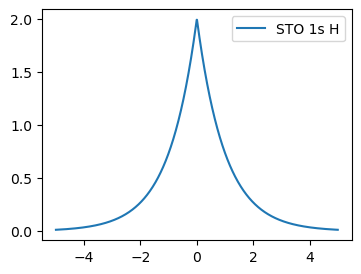

In [22]:
x = np.linspace(-5,5,num=1000)
r = abs(x)
alpha = 1.0

R = 2*alpha**(1.5)*np.exp(-alpha*r)

plt.figure(figsize=(4,3))
plt.plot(x,R,label="STO 1s H")
plt.legend()

### **3. Espace symétrique et antisymétrique des orbitales de type GTO**

  _Soit $\phi_{1S}(r)= (\frac{2\alpha}{\pi})^{\frac{3}{4}}e^{-\alpha r^2}$ la fonction d'etat d'un electron a la position r._

 (a) Ecrire les fonctions d'etat de type Gaussienne symétriques et antisymétriques normalisées de He.
 

In [23]:
#Reponse


(b) Ecrire un code python permettant de visualiser ces fonctions.


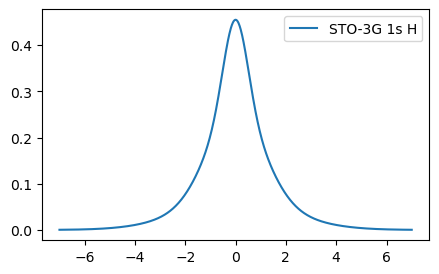

In [24]:
#Reponse
x = np.linspace(-7,7,num=1000)
r = abs(x)
c = [0.444635,0.535328,0.154329]
alpha = [0.109818,0.405771,2.227660]

psi = 0
for k in range(3):
    psi += c[k]*(2*alpha[k]/np.pi)**0.75 * np.exp(-alpha[k]*r**2)

plt.figure(figsize=(5,3))
plt.plot(x,psi,label="STO-3G 1s H")
plt.legend()


### 2 - Relations d'anti-commutation

In [25]:
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.operators.commutators import anti_commutator

   Verifier les egalités suivantes :
   
   * $\{a_1, \ad_1\}= 1$
   
   * $\{\ad_2, \ad_3\}= 0$
   
   * $\{\ad_2, \ad_3\}= 0$
   * $\ad_0a_1\ad_1a_2 = \ad_0a_2 - \ad_0\ad_1a_1\ad_2$
   
   * $\ad_0a_4+\ad_0a_2=0$

In [26]:
#Reponse



## 3 - Problème de structure électronique : Cas de la molécule d’eau (H2O)



  On donne les coordonnées xyz de la molécule
  
  **H : 0.968877 0.012358 0.000000**
  
  **O : -0.019830 -0.025588 0.000000**
  
  **H : -0.229801 0.941311 0.000000**



In [27]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver


  * Reprendre les étapes du problème électronique du cas de la molécule d’hydrogène pour
traiter le cas de la molécule d’eau.


In [28]:
#reponse
H2O_driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

In [29]:
H2O_problem = H2O_driver.run()
print(H2O_problem)

In [30]:
H2O_hamiltonian = H2O_problem.hamiltonian

H2O_coefficients = H2O_hamiltonian.electronic_integrals
print(H2O_coefficients.alpha)

Polynomial Tensor
 "+-":
[[-1.25633907e+00  0.00000000e+00]
 [-8.32667268e-17 -4.71896007e-01]]
 "++--":
[[[[6.75710155e-01 2.28983499e-16]
   [4.44089210e-16 1.80931200e-01]]

  [[1.38777878e-16 1.80931200e-01]
   [6.64581730e-01 5.27355937e-16]]]


 [[[1.87350135e-16 6.64581730e-01]
   [1.80931200e-01 0.00000000e+00]]

  [[1.80931200e-01 1.94289029e-16]
   [1.66533454e-16 6.98573723e-01]]]]


In [31]:
H2O_fermionic_op = H2O_hamiltonian.second_q_op()
print(H2O_fermionic_op)

Fermionic Operator
number spin orbitals=4, number terms=36
  0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211568 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211561 * ( +_0 +_1 -_0 -_1 )
+ 0.3322908651276482 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211568 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211561 * ( +_0 +_3 -_2 -_1 )
+ 0.3322908651276482 * ( +_0 +_3 -_3 -_0 )
+ 0.33229086512764805 * ( +_1 +_0 -_0 -_1 )
+ 0.0904655998921157 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211564 * ( +_1 +_1 -_0 -_0 )
+ 0.3492868613660087 * ( +_1 +_1 -_1 -_1 )
+ 0.33229086512764805 * ( +_1 +_2 -_2 -_1 )
+ 0.0904655998921157 * ( +_1 +_2 -_3 -_0 )
+ 0.09046559989211564 * ( +_1 +_3 -_2 -_0 )
+ 0.3492868613660087 * ( +_1 +_3 -_3 -_1 )
+ 0.33785507740175813 * ( +_2 +_0 -_0 -_2 )
+ 0.09046559989211568 * ( +_2 +_0 -_1 -_3 )
+ 0.09046559989211561 * ( +_2 +_1 -_0 -_3 )
+ 0.3322908651276482 * ( +_2 +_1 -_1 -_2 )
+ 0.33785507740175813 * ( +_2 +_2 -_2 -_2 )
+ 0.09046559989211568 * 

In [32]:
H2O_hamiltonian.nuclear_repulsion_energy 

0.7199689944489797

* Imprimer les 6 premiers termes de l'opérateur fermionique de la molécule $H_2O$:

In [33]:
#reponse
print("\n".join(str(H2O_fermionic_op).splitlines()[:8]+["..."]))

Fermionic Operator
number spin orbitals=4, number terms=36
  0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211568 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211561 * ( +_0 +_1 -_0 -_1 )
+ 0.3322908651276482 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211568 * ( +_0 +_2 -_3 -_1 )
...


* Utiliser la méthode `FermionicOp.to_matrix` pour obtenir une représentation matricielle de la molécule d'eau dans la base de Fock.

In [34]:
#reponse

In [35]:
print(H2O_fermionic_op.to_matrix())

  (1, 1)	(-0.47189600728114145+0j)
  (2, 2)	(-1.2563390730032498+0j)
  (3, 3)	(-1.2445845498133261+0j)
  (4, 4)	(-0.47189600728114145+0j)
  (5, 5)	(-0.24521829183026544+0j)
  (10, 5)	(0.18093119978423136+0j)
  (6, 6)	(-1.063653350029095+0j)
  (9, 6)	(0.1809311997842313+0j)
  (7, 7)	(-0.3533251041071538+0j)
  (8, 8)	(-1.2563390730032498+0j)
  (6, 9)	(0.1809311997842313+0j)
  (9, 9)	(-1.063653350029095+0j)
  (5, 10)	(0.18093119978423128+0j)
  (10, 10)	(-1.8369679912029833+0j)
  (11, 11)	(-1.1606317377577633+0j)
  (12, 12)	(-1.2445845498133261+0j)
  (13, 13)	(-0.3533251041071539+0j)
  (14, 14)	(-1.1606317377577637+0j)
  (15, 15)	(0.2142782384194739+0j)



Lien utile : https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/chemistry/QubitMappings.ipynb?short_path=70b1d78

In [20]:
import qiskit.tools.jupyter

%qiskit_version_table